In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import glob
import random
#morgan prukop
#code modeled after:
# https://www.kaggle.com/sathishpbs/face-detectmodel-using-vgg19
# https://www.kaggle.com/nageshsingh/mask-and-social-distancing-detection-using-vgg19
# references:
# https://www.analyticsvidhya.com/blog/2021/07/step-by-step-guide-for-image-classification-on-custom-datasets/
# https://www.analyticsvidhya.com/blog/2021/01/image-classification-using-convolutional-neural-networks-a-step-by-step-guide/

In [2]:
# test_da uses combined image scraping from google and kaggle dataset
Test_da = 'C:/Users/Morga/Downloads/NFLX_Team2_Project3/simple_images/Test'
Train_da = 'C:/Users/Morga/Downloads/NFLX_Team2_Project3/simple_images/Train'
Validation_da = 'C:/Users/Morga/Downloads/NFLX_Team2_Project3/simple_images/Validation'

## Keras Image augmentation 
Helps expand the data set in real time by applying transformations to our images in our dataset. 

Helps make our model robust.


https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

In [3]:
# Image size
IMG_SIZE = (128, 128)


# data argumentation
DataGen = ImageDataGenerator(rotation_range=45,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       vertical_flip=True,
                                       rescale=1/255.0,width_shift_range=0.2,
                                     height_shift_range=0.2)

Train_data = DataGen.flow_from_directory(Train_da, target_size=(IMG_SIZE), 
                                         color_mode="rgb",
                                         batch_size=200, 
                                         shuffle=True,
                                         class_mode="categorical")

Test_data = DataGen.flow_from_directory(Test_da, target_size=(IMG_SIZE), 
                                         color_mode="rgb",
                                         batch_size=64, 
                                         shuffle=True,
                                         class_mode="categorical")

Validation_data = DataGen.flow_from_directory(Validation_da, target_size=(IMG_SIZE), 
                                         color_mode="rgb",
                                         batch_size=64, 
                                         shuffle=True,
                                         class_mode="categorical")

Found 10000 images belonging to 2 classes.
Found 1229 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


https://towardsdatascience.com/beginners-guide-on-image-classification-vgg-19-resnet-50-and-inceptionresnetv2-with-tensorflow-4909c6478941


In [4]:
model = Sequential()

# using vgg19 model
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(128,128,3))
for layer in vgg19.layers:
    layer.trainable = False

model.add(vgg19)

model.add(Flatten())
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))

# Add output layers
model.add(Dense(2, activation='sigmoid', kernel_initializer="glorot_uniform"))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 21,073,346
Trainable params: 1,048,962
Non-trainable params: 20,024,384
_________________________________________________________________


In [5]:
Model = model.fit(Train_data, validation_data=(Validation_data), epochs=10)

Epoch 1/10
50/50 [==============================] - 1140s 23s/step - loss: 0.4853 - accuracy: 0.8004 - val_loss: 0.2547 - val_accuracy: 0.8975
Epoch 2/10
50/50 [==============================] - 1025s 20s/step - loss: 0.1967 - accuracy: 0.9266 - val_loss: 0.1977 - val_accuracy: 0.9187
Epoch 3/10
50/50 [==============================] - 1122s 23s/step - loss: 0.1651 - accuracy: 0.9370 - val_loss: 0.1868 - val_accuracy: 0.9275
Epoch 4/10
50/50 [==============================] - 1179s 24s/step - loss: 0.1500 - accuracy: 0.9436 - val_loss: 0.1680 - val_accuracy: 0.9362
Epoch 5/10
50/50 [==============================] - 1235s 25s/step - loss: 0.1485 - accuracy: 0.9446 - val_loss: 0.2064 - val_accuracy: 0.9175
Epoch 6/10
50/50 [==============================] - 1277s 26s/step - loss: 0.1302 - accuracy: 0.9524 - val_loss: 0.1501 - val_accuracy: 0.9413
Epoch 7/10
50/50 [==============================] - 1280s 26s/step - loss: 0.1252 - accuracy: 0.9533 - val_loss: 0.1642 - val_accuracy: 0.9438

https://www.kaggle.com/feyzazkefe/mask-and-social-distancing-detection-using-vgg19

https://www.kaggle.com/sathishpbs/face-detectmodel-using-vgg19

https://www.analyticsvidhya.com/blog/2021/07/step-by-step-guide-for-image-classification-on-custom-datasets/

https://www.analyticsvidhya.com/blog/2021/01/image-classification-using-convolutional-neural-networks-a-step-by-step-guide/

https://www.kaggle.com/nageshsingh/mask-and-social-distancing-detection-using-vgg19

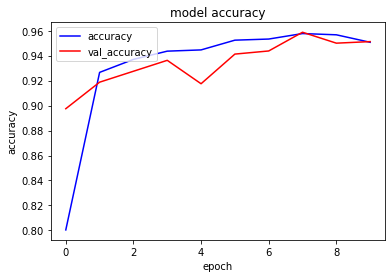

In [10]:
#Plotting the graphs for accuracy and validation_accuracy
plt.plot(Model.history['accuracy'],"-b", label="accuracy")
plt.plot(Model.history['val_accuracy'],"-r", label="val_accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

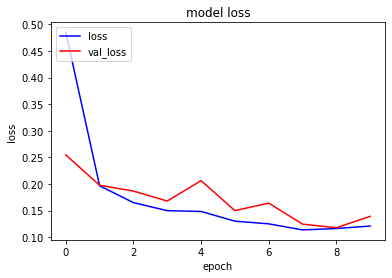

In [17]:
#Plotting the graphs for loss and validation_loss
plt.plot(Model.history['loss'],"-b", label="loss")
plt.plot(Model.history['val_loss'],"-r", label="val_loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

In [18]:
probabilities = model.predict(Test_data)

In [29]:
y_pred = probabilities.argmax(axis=-1)
y_test = Test_data.classes

print("Test Accuracy Score of Model:", accuracy_score(y_pred,y_test))
classes = ['With Mask', 'Without Mask']

Test Accuracy Score of Model: 0.5077298616761595


In [30]:
print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

   With Mask       0.53      0.58      0.55       651
Without Mask       0.47      0.43      0.45       578

    accuracy                           0.51      1229
   macro avg       0.50      0.50      0.50      1229
weighted avg       0.51      0.51      0.51      1229



In [31]:
def preprocessing_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    return img

C:/Users/Morga/Downloads/NFLX_Team2_Project3/simple_images/Test\WithoutMask\1808.png


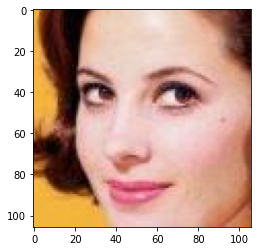

In [88]:
random_test_img = random.choice(glob.glob(Test_da+"/*/*"))
print(random_test_img)
img_test = cv2.imread(random_test_img)
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
plt.imshow(img_test)
plt.show()

In [89]:
img_test = preprocessing_img(img_test)
result = model.predict(img_test)
score = np.max(result)
predicted_class = classes[np.argmax(result)]
print(predicted_class)
print("Confident: ", score)

Without Mask
Confident:  0.9972583
